In [76]:
import numpy as np
import matplotlib.pyplot as plt


def test_data():
    X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
    y_train = np.array([460, 232, 178])

    b_init = 785.1811367994083
    w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

    return X_train, y_train, w_init, b_init


def compute_cost_test(target):
    X_train, y_train, w_init, b_init = test_data()
    cost = target(X_train, y_train, w_init, b_init)
    target_cost = 1.5578904045996674e-12
    assert np.isclose(
        cost, target_cost, rtol=1e-4), f"Case 1: Cost must be {target_cost} for a perfect prediction but got {cost}"

    print("\033[92mAll tests passed!")


def compute_gradient_test(target):
    X_train, y_train, w_init, b_init = test_data()

    dj_db, dj_dw = target(X_train, y_train, w_init, b_init)
    #assert dj_dw.shape == w_init.shape, f"Wrong shape for dj_dw. {dj_dw} != {w_init.shape}"
    target_dj_db = -1.6739251122999121e-06
    target_dj_dw = [-2.73e-3, - 6.27e-6, - 2.22e-6, - 6.92e-5]

    assert np.isclose(dj_db, target_dj_db,
                      rtol=1e-4), f"Case 1: dj_db is wrong: {dj_db} != {target_dj_db}"
    assert np.allclose(
        dj_dw, target_dj_dw, rtol=1e-02), f"Case 1: dj_dw is wrong: {dj_dw} != {target_dj_dw}"

    print("\033[92mAll tests passed!")


In [63]:
from google.colab import files
uploaded = files.upload()

Saving houses.txt to houses (2).txt


In [64]:
def load_data_multi():
    data = np.loadtxt("houses.txt", delimiter=',')
    X = data[:, [0,1,2,3]]  # Tomar todas las columnas excepto la última para X
    y = data[:, 4]   # Tomar la última columna para y
    return X, y


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math


def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    #calculamos la media (µ) y la deviacion estandar (σ) para el input data
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    #aplicamos la formula de z-score normalization
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)


def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter
    Returns
      cost (scalar)    : cost
    """

    #calculamos las predicciones de manera vectorial
    fw_b = np.dot(X, w) + b

    #calculamos el coste segun la funcion de coste dada
    cost = (1/(2*len(y))) * np.sum(np.square(fw_b - y))

    return cost


def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X : (ndarray Shape (m,n)) matrix of examples
      y : (ndarray Shape (m,))  target value of each example
      w : (ndarray Shape (n,))  parameters of the model
      b : (scalar)              parameter of the model
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
    """
    #calculamos las prediccionesde manera vectorial
    fw_b = np.dot(X, w) + b


    #calculamos los gradientes de las funciones de coste respecto a los parametros w y b
    dj_dw = (1/len(y)) * np.dot((fw_b - y), X)
    dj_db = (1/len(y)) * np.sum(fw_b - y)


    return dj_db, dj_dw


def gradient_descent(X, y, w_in, b_in, cost_function,
                     gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X : (array_like Shape (m,n)    matrix of examples
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model
          after running gradient descent
      b : (scalar)                Updated value of parameter of the model
          after running gradient descent
      J_history : (ndarray): Shape (num_iters,) J at each iteration,
          primarily for graphing later
    """
    #inicializamos la lista
    J_history = []

    for a in range(num_iters):

        #calculamos el gradiente con la funcion que nos pasan por parametros
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)
        #actualizamos los parametros
        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db

        #calculamos el coste con la funcion que nos pasan por parametros
        cost = cost_function(X, y, w_in, b_in)

        #añadimos el coste de cada iteracion a la lista
        J_history.append(cost)

    return w_in, b_in, J_history


In [80]:
compute_gradient_test(compute_gradient)
compute_cost_test(compute_cost)

All tests passed!
All tests passed!


In [105]:


##datos de entrenamiento
x_train, y_train = load_data_multi()
#normalizamos los datos
x_train_norm, mu, sigma = zscore_normalize_features(x_train)

#inicializamos variables
w_init = np.zeros(4)
b_init = 0
alpha = 0.3
num_iters = 1000

#entrenamos el modelo
w_trained, b_trained, J_history = gradient_descent(x_train_norm, y_train, w_init, b_init,
                                                    compute_cost, compute_gradient, alpha, num_iters)

#predecimos
x_pred = np.array([[1200, 3, 1, 40]])
#normalizamos los valores de entrada con los mismos valores con los que lo hicimos con los datos de entrenamiento
x_new_norm =  (x_pred - mu) / sigma
#predecimos de manera vectorial con los datos entrenados
predicted_price = np.dot(x_new_norm, w_trained) + b_trained
print("Predicted Price for the new house:", predicted_price)


Predicted Price for the new house: [318.93635904]


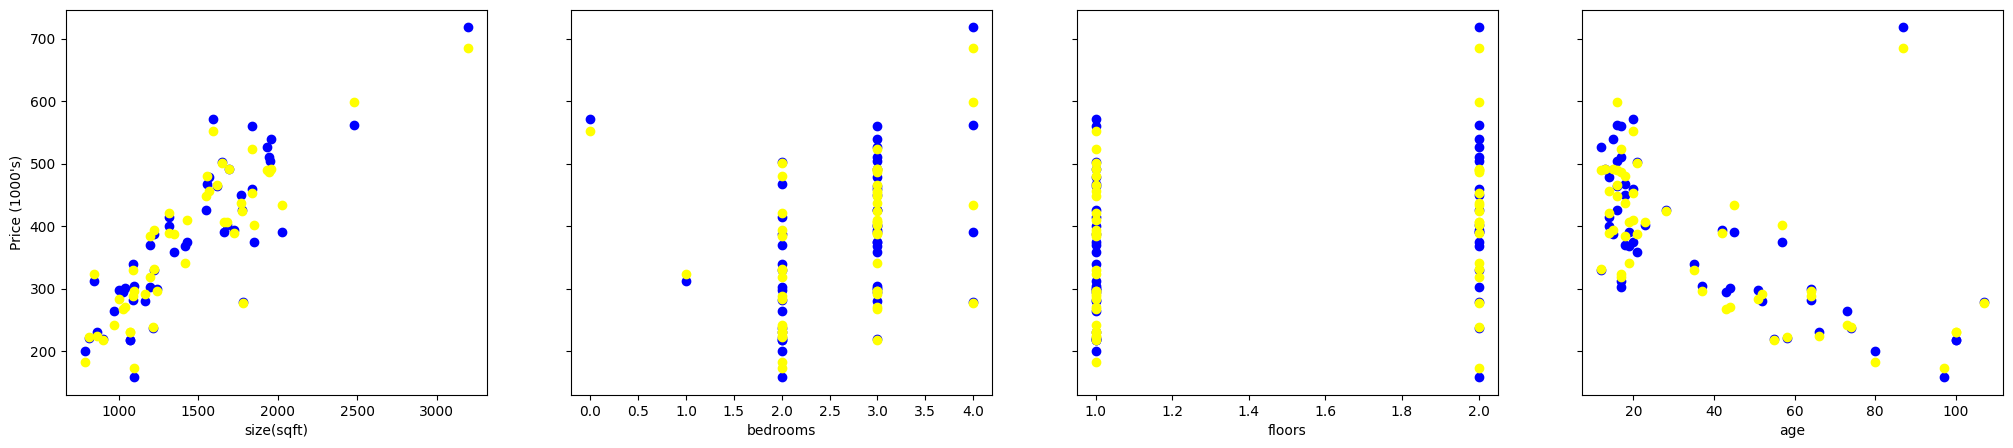

In [108]:
#A dibujar

data_train = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
X_train = data_train[:, :4]
y_train = data_train[:, 4]

#predecimos sobre el dato de entrenamiento
normX = (X_train - mu) / sigma
predicted = np.dot(normX, w_trained) + b_trained

#dibujamos los datos de entrenamieto reales en azul con las predicciones en amarillo
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']
fig, ax = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
for i in range(len(ax)):
  ax[i].scatter(X_train[:, i], y_train, color='blue')
  ax[i].scatter(X_train[:,i], predicted, color='yellow')
  ax[i].set_xlabel(X_features[i])
  ax[0].set_ylabel("Price (1000's)")


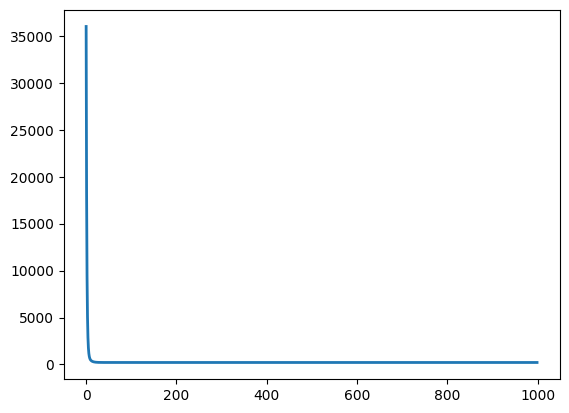

In [129]:
#Dibujamos grafica de Jhistory y num iteraciones
fig, ax = plt.subplots()
ax.plot(J_history, linewidth=2.0)
plt.show()

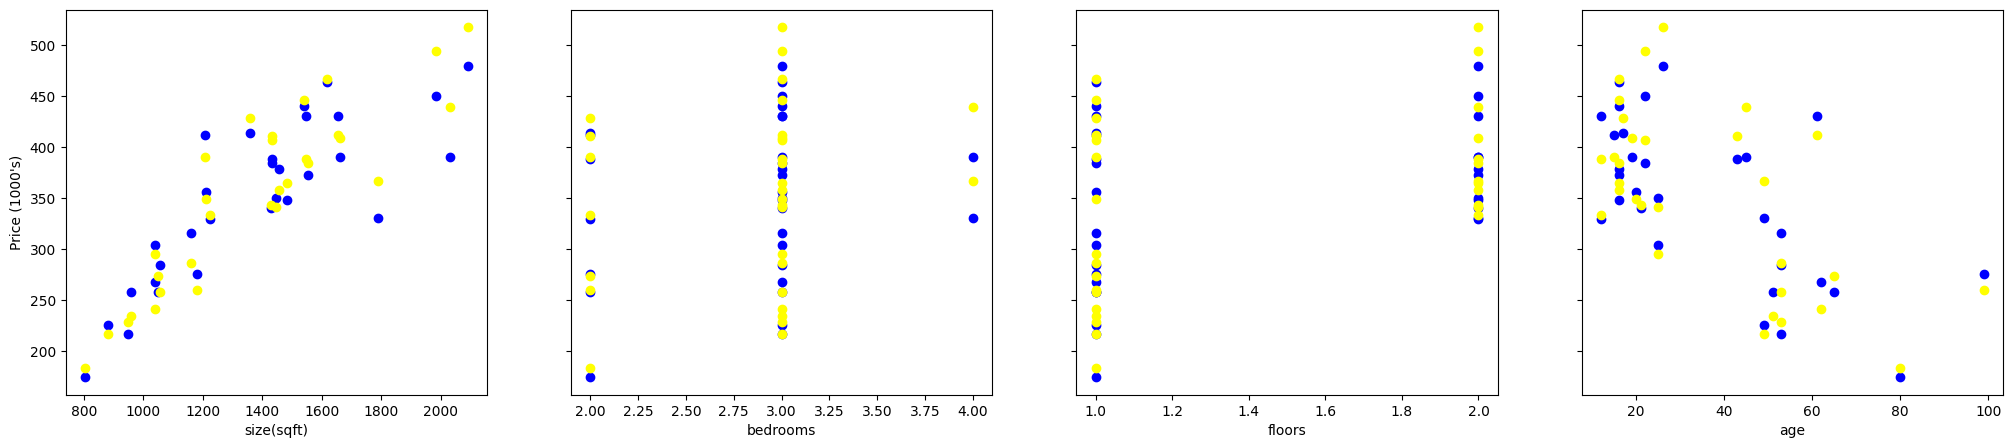

In [128]:
#input data 70/30 train test
data_train = np.loadtxt("houses.txt", delimiter=',')
xtrain = data_train[:70, :4]
ytrain = data_train[:70, 4]

xtest = data_train[70:, :4]
ytest = data_train[70:, 4]


#normalizamos los datos
x_train_norm, mu, sigma = zscore_normalize_features(xtrain)

#inicializamos variables
w_init = np.zeros(4)
b_init = 0
alpha = 0.3
num_iters = 1000

#entrenamos el modelo
w_trained, b_trained, J_history = gradient_descent(x_train_norm, ytrain, w_init, b_init,
                                                    compute_cost, compute_gradient, alpha, num_iters)
#predecimos sobre el dato de entrenamiento
normxtest = (xtest - mu) / sigma
predicted = np.dot(normxtest, w_trained) + b_trained

#dibujamos los datos de tes reales en azul con las predicciones en amarillo
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']
fig, ax = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
for i in range(len(ax)):
  ax[i].scatter(xtest[:,i], ytest, color='blue')
  ax[i].scatter(xtest[:,i], predicted, color='yellow')
  ax[i].set_xlabel(X_features[i])
  ax[0].set_ylabel("Price (1000's)")